In [ ]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
with open('../../outputs/bert/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

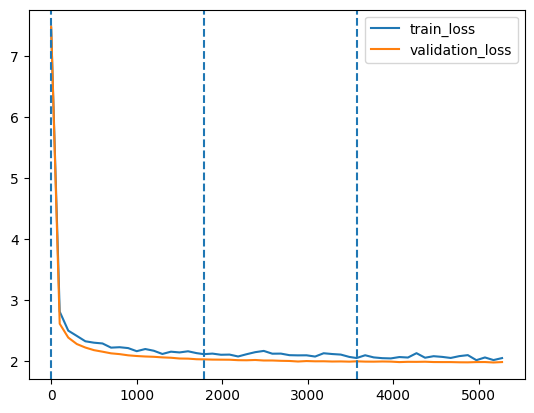

In [ ]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

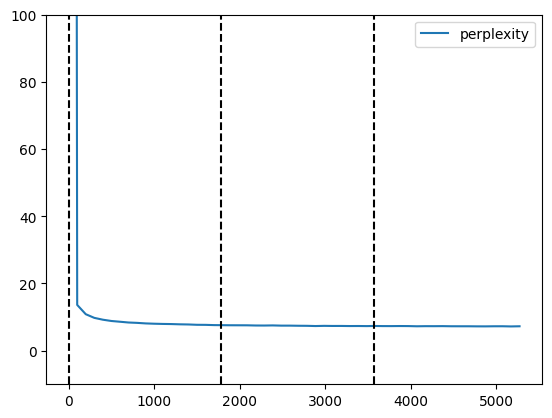

In [ ]:
plt.plot(*list(zip(*[(m['global_step'], m['perplexity']) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.ylim(top=100, bottom=-10)
plt.legend()
plt.show()

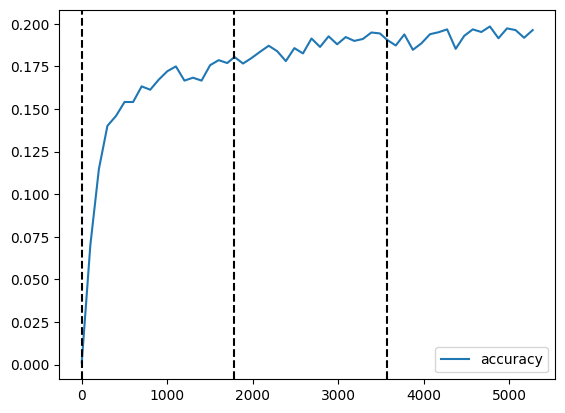

In [ ]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.legend()
plt.show()

In [ ]:
min([m['validation_loss'] for m in training_metrics])

1.9763548374176025

# Final Evaluation Outputs

In [ ]:
food_names = np.load('../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1109,)

In [ ]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
input[1].shape

torch.Size([1000, 13])

In [ ]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'mask_pos': input[3].tolist(),
    'label': food_names[input[2]].tolist(),
    'prediction': food_names[output.argmax(2)].tolist(), 
})

,input,label,prediction
0,"[gelatin, water, yogurt, sugar, vanilla, cardamom, sweet orange, sweet orange, cinnamon, <pad>, <pad>, <pad>, <pad>]","[water, yogurt, sugar, vanilla, cardamom, sweet orange, sweet orange, cinnamon, <pad>, <pad>, <pad>, <pad>, <pad>]","[water, pineapple, sugar, vanilla, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
1,"[egg roll, sugar, pudding, sugar, cinnamon, margarine, nut, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[sugar, pudding, sugar, cinnamon, margarine, nut, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[cheese, butter, butter, cinnamon, butter, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
2,"[cracker, butter, sugar, flour, sauce, water, cocoa powder, water, salt, potato chip, marshmallow, <pad>, <pad>]","[butter, sugar, flour, sauce, water, cocoa powder, water, salt, potato chip, marshmallow, <pad>, <pad>, <pad>]","[butter, sugar, cheese, cheese, cheese, cheese, egg, egg, egg, butter, <pad>, <pad>, <pad>]"
3,"[coffee, almond, curry powder, sugar substitute, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[almond, curry powder, sugar substitute, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[cream, cream, cinnamon, cinnamon, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
4,"[pie crust, spinach, egg, onion-family vegetable, nutmeg, crab, cheese, evaporated milk, salt, pepper, cheese, parsley, <pad>]","[spinach, egg, onion-family vegetable, nutmeg, crab, cheese, evaporated milk, salt, pepper, cheese, parsley, <pad>, <pad>]","[cheese, cheese, cheese, cheese, cheese, cheese, <pad>, <pad>, pepper, <pad>, <pad>, <pad>, <pad>]"
...,...,...,...
995,"[meat bouillon, onion-family vegetable, green turtle, sauce, garlic, green bean, rice, cheese, tortilla, <pad>, <pad>, <pad>, <pad>]","[onion-family vegetable, green turtle, sauce, garlic, green bean, rice, cheese, tortilla, <pad>, <pad>, <pad>, <pad>, <pad>]","[onion-family vegetable, pepper, cheese, cheese, curry powder, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
996,"[chicken, sauce, walnut, sweet orange, <unknown>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[sauce, walnut, sweet orange, <unknown>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[chicken, cheese, cheese, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
997,"[egg, cream, buttermilk, honey, curry powder, water, salt, flour, butter, vanilla, domestic pig, butter, syrup]","[cream, buttermilk, honey, curry powder, water, salt, flour, butter, vanilla, domestic pig, butter, syrup, <pad>]","[sugar, cheese, flour, vanilla, flour, flour, flour, <pad>, <pad>, <pad>, <pad>, sugar, sugar]"
998,"[butter, flour, flour, curry powder, salt, sugar, egg, vanilla, milk cow, chocolate, <pad>, <pad>, <pad>]","[flour, flour, curry powder, salt, sugar, egg, vanilla, milk cow, chocolate, <pad>, <pad>, <pad>, <pad>]","[sugar, milk cow, milk cow, salt, sugar, egg, milk cow, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]"
